In [ ]:
import pandas as pd

# Load datasets
admissions = pd.read_csv("admissions.csv")
fatalities = pd.read_csv("fatalities.csv")
metrics = pd.read_csv("metrics.csv")
prescriptions = pd.read_csv("prescriptions.csv")
smokers = pd.read_csv("smokers.csv")

for df in [admissions, fatalities, metrics, prescriptions, smokers]:
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")

# Merge all datasets on 'Year'
merged_df = admissions \
    .merge(fatalities, on=["Year", "ICD10 Code", "ICD10 Diagnosis", "Diagnosis Type", "Metric", "Sex"], suffixes=("_admissions", "_fatalities"), how="outer") \
    .merge(metrics, on="Year", how="left") \
    .merge(prescriptions, on="Year", how="left") \
    .merge(smokers, on="Year", how="left")

# Show merged dataset structure
print("Final Merged Data Shape:", merged_df.shape)
print("Columns in Merged Dataset:", merged_df.columns)


Final Merged Data Shape: (28116, 32)
Columns in Merged Dataset: Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric',
       'Sex_x', 'Value_admissions', 'Value_fatalities', 'Tobacco Price\nIndex',
       'Retail Prices\nIndex',
       'Tobacco Price Index Relative to Retail Price Index',
       'Real Households' Disposable Income', 'Affordability of Tobacco Index',
       'Household Expenditure on Tobacco', 'Household Expenditure Total',
       'Expenditure on Tobacco as a Percentage of Expenditure',
       'All Pharmacotherapy Prescriptions',
       'Nicotine Replacement Therapy (NRT) Prescriptions',
       'Bupropion (Zyban) Prescriptions',
       'Varenicline (Champix) Prescriptions',
       'Net Ingredient Cost of All Pharmacotherapies',
       'Net Ingredient Cost of Nicotine Replacement Therapies (NRT)',
       'Net Ingredient Cost of Bupropion (Zyban)',
       'Net Ingredient Cost of Varenicline (Champix)', 'Method', 'Sex_y',
       '16 and Over', '16-24',

### Data Exploration & Visualization📊📈

In [6]:
# Check basic statistics for numerical columns
print("Basic Statistics:\n", merged_df.describe())

# Check unique values in categorical columns
cat_cols = merged_df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"Unique values in {col}:\n", merged_df[col].unique(), "\n")


Basic Statistics:
            Year  Tobacco Price\nIndex  Retail Prices\nIndex  \
count    5247.0           5247.000000           5247.000000   
mean     2009.0            879.981818            329.063636   
std    3.162579            184.533620             33.710975   
min      2004.0            654.600000            279.300000   
25%      2006.0            713.700000            296.400000   
50%      2009.0            815.900000            321.300000   
75%      2012.0           1057.800000            363.100000   
max      2014.0           1226.000000            383.000000   

       Tobacco Price Index Relative to Retail Price Index  \
count                                        5247.000000    
mean                                          264.645455    
std                                            28.140116    
min                                           234.400000    
25%                                           240.800000    
50%                                           2

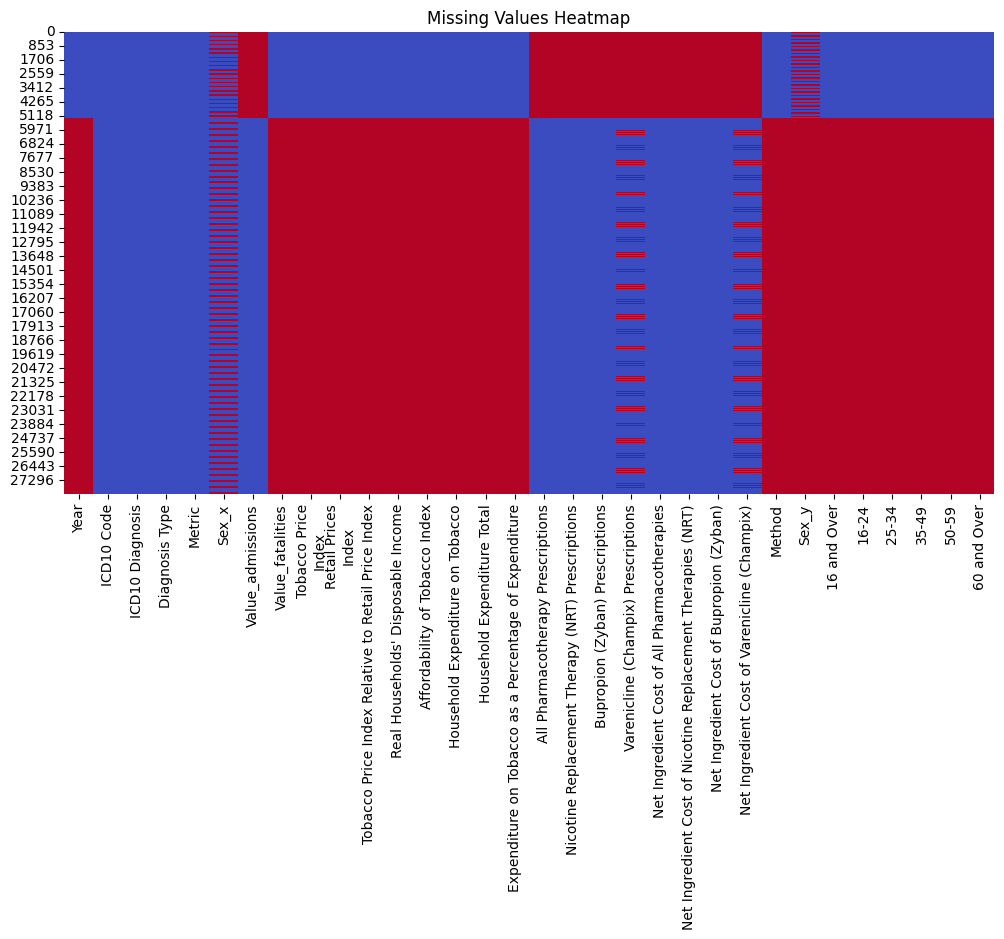

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isnull(), cmap="coolwarm", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


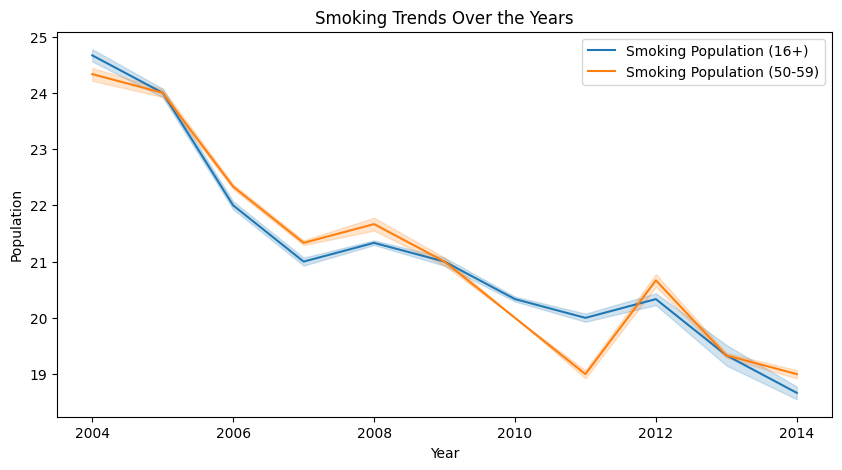

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="16 and Over", data=merged_df, label="Smoking Population (16+)")
sns.lineplot(x="Year", y="50-59", data=merged_df, label="Smoking Population (50-59)")
plt.title("Smoking Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()


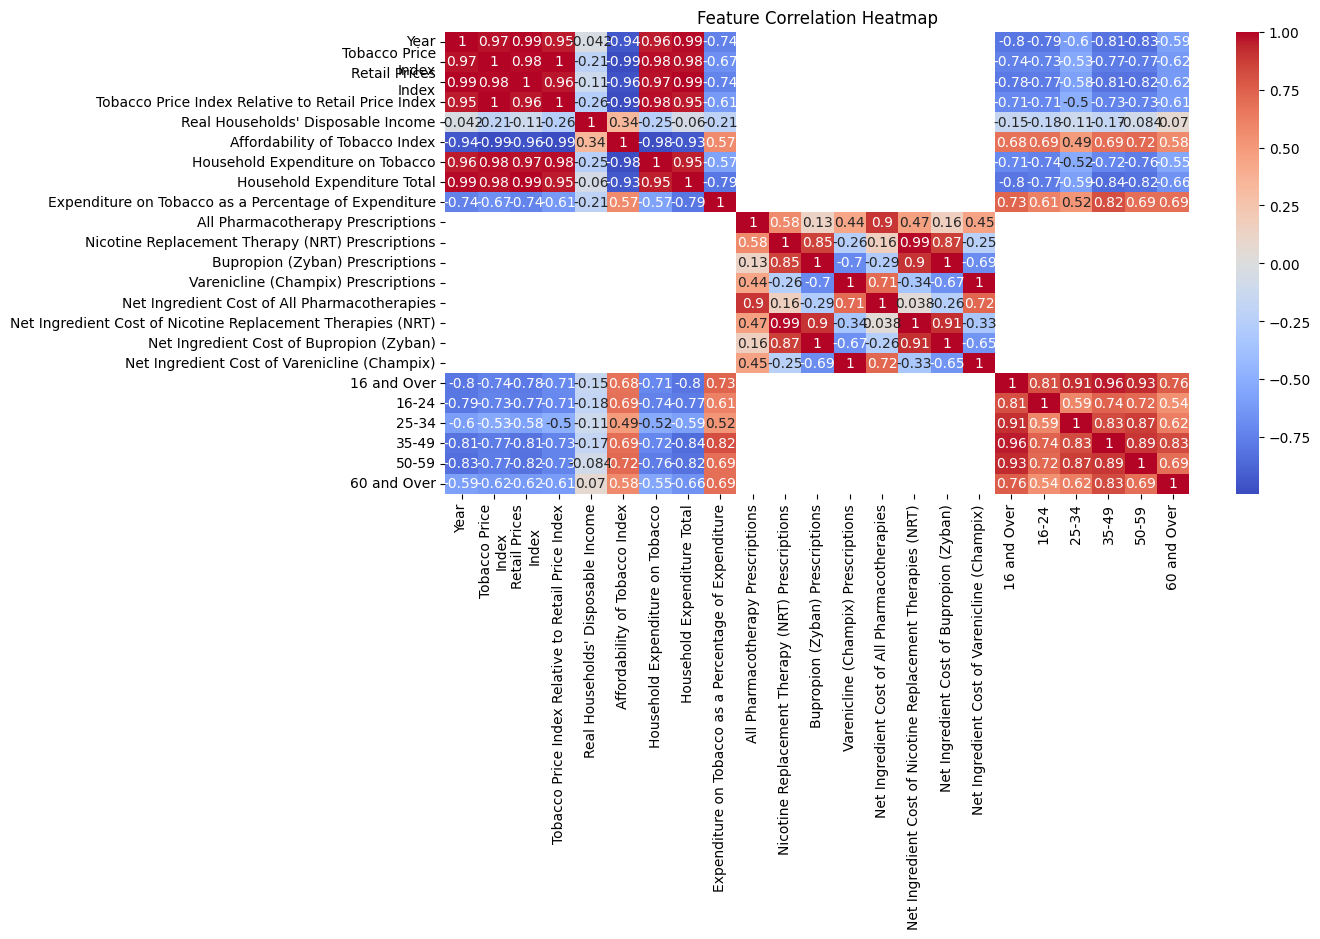

In [11]:
# Remove non-numeric columns
numeric_df = merged_df.select_dtypes(include=["number"])

# Now plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


### Feature Selection

In [ ]:
# Updated feature selection (Check correct column names)
selected_features = [
    "Year", "ICD10 Code", "ICD10 Diagnosis", "Diagnosis Type", "Metric",  
    "Sex_x",
    "Tobacco Price\nIndex", "Retail Prices\nIndex", "Affordability of Tobacco Index",
    "Household Expenditure on Tobacco", "Household Expenditure Total",
    "16 and Over", "16-24", "25-34", "35-49", "50-59", "60 and Over"
]

# Select only important columns
filtered_df = merged_df[selected_features + ["Value_fatalities"]]

# Show dataset shape after feature selection
print("Dataset shape after feature selection:", filtered_df.shape)

Dataset shape after feature selection: (28116, 18)


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
cat_cols = ["ICD10 Code", "ICD10 Diagnosis", "Diagnosis Type", "Metric", "Sex_x"]
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    filtered_df[col] = le.fit_transform(filtered_df[col])
    label_encoders[col] = le

# Save encoders for later use in Streamlit
import joblib
joblib.dump(label_encoders, "D:/PROGRAMMING LANGUAGES/PYTHON/JUPYTER NOTEBOOK/streamlit/Tobacco Project/label_encoders.pkl")

# Show sample after encoding
print(filtered_df.head())


   Year  ICD10 Code  ICD10 Diagnosis  Diagnosis Type  Metric  Sex_x  \
0  2004           0                4               3       0      0   
1  2004           0                4               3       0      0   
2  2004           0                4               3       0      0   
3  2004           0                4               3       0      1   
4  2004           0                4               3       0      1   

   Tobacco Price\nIndex  Retail Prices\nIndex  Affordability of Tobacco Index  \
0                 654.6                 279.3                            80.5   
1                 654.6                 279.3                            80.5   
2                 654.6                 279.3                            80.5   
3                 654.6                 279.3                            80.5   
4                 654.6                 279.3                            80.5   

   Household Expenditure on Tobacco  Household Expenditure Total  16 and Over  \
0    

C:\Users\varsh\AppData\Local\Temp\ipykernel_17424\597297179.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = le.fit_transform(filtered_df[col])
C:\Users\varsh\AppData\Local\Temp\ipykernel_17424\597297179.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = le.fit_transform(filtered_df[col])
C:\Users\varsh\AppData\Local\Temp\ipykernel_17424\597297179.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = filtered_df.drop(columns=["Value_fatalities"])
y = filtered_df["Value_fatalities"]

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset shape
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (22492, 17)
Testing Data Shape: (5624, 17)


In [20]:
# 1️⃣ Ensure all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# 2️⃣ Check for missing values in training data
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in y_train:\n", y_train.isnull().sum())

# 3️⃣ Fill missing values with median for numerical data
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# 4️⃣ Fill missing values in target variable (if any)
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

# 5️⃣ Verify missing values are removed
print("✅ Missing values after cleaning:\n", X_train.isnull().sum(), y_train.isnull().sum())


Missing values in X_train:
 Year                                0
ICD10 Code                          0
ICD10 Diagnosis                     0
Diagnosis Type                      0
Metric                              0
Sex_x                               0
Tobacco Price\nIndex                0
Retail Prices\nIndex                0
Affordability of Tobacco Index      0
Household Expenditure on Tobacco    0
Household Expenditure Total         0
16 and Over                         0
16-24                               0
25-34                               0
35-49                               0
50-59                               0
60 and Over                         0
dtype: int64
Missing values in y_train:
 18341
✅ Missing values after cleaning:
 Year                                0
ICD10 Code                          0
ICD10 Diagnosis                     0
Diagnosis Type                      0
Metric                              0
Sex_x                               0
Tobacco Price\nIn

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save trained model
import joblib
joblib.dump(model, "D:/PROGRAMMING LANGUAGES/PYTHON/JUPYTER NOTEBOOK/streamlit/Tobacco Project/mortality_model.pkl")

print("✅ Model Training Done & Saved!")


✅ Model Training Done & Saved!


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print accuracy metrics
print("📊 Model Accuracy Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R-Squared Score (R²): {r2:.4f} (Higher is better)")


📊 Model Accuracy Metrics:
🔹 Mean Absolute Error (MAE): 100.66
🔹 Mean Squared Error (MSE): 138934.15
🔹 R-Squared Score (R²): 0.9998 (Higher is better)


### Exploratory Data Analysis (EDA) 📊

#### Feature Distribution

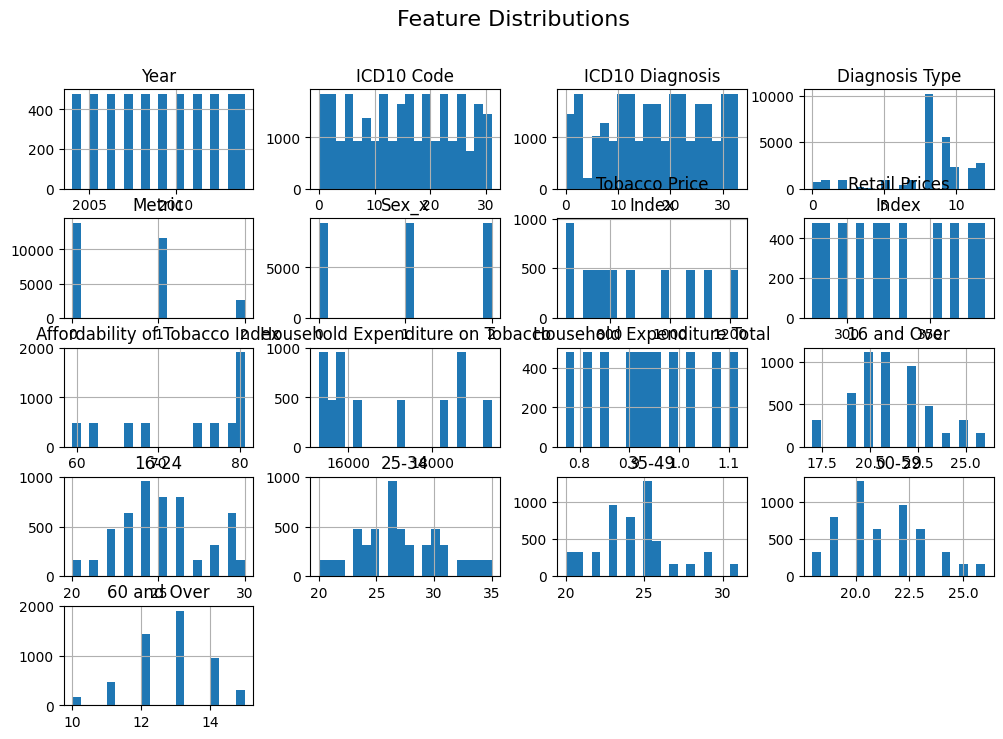

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
filtered_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


#### Smoking Vs. Mortality rate

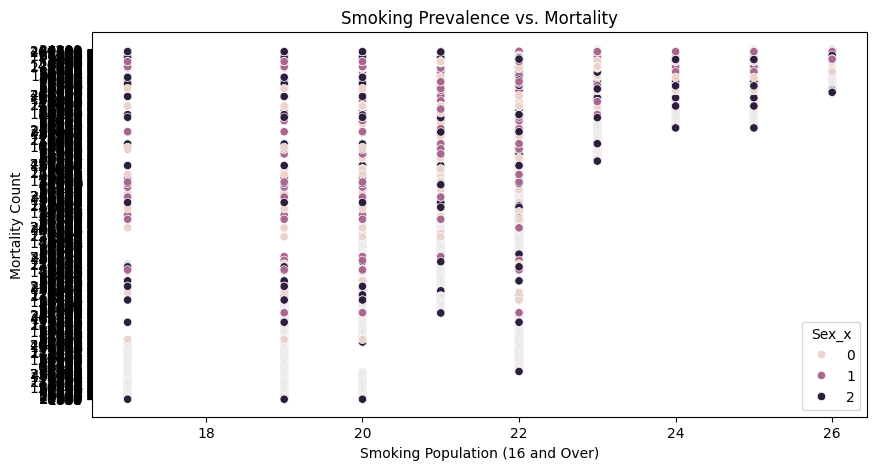

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=filtered_df["16 and Over"], y=filtered_df["Value_fatalities"], hue=filtered_df["Sex_x"])
plt.title("Smoking Prevalence vs. Mortality")
plt.xlabel("Smoking Population (16 and Over)")
plt.ylabel("Mortality Count")
plt.show()


####  Heatmap (Feature Correlation)

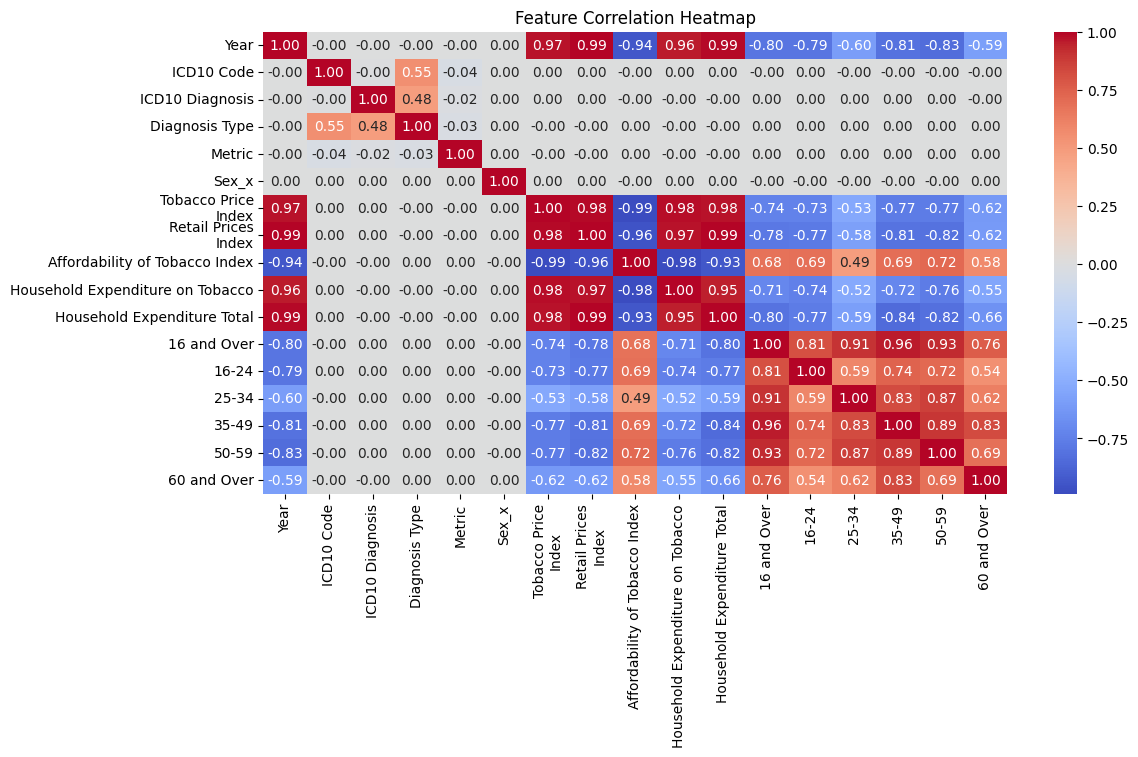

In [26]:
# Select only numerical columns
numeric_df = filtered_df.select_dtypes(include=["number"])

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#### Count Mortality number

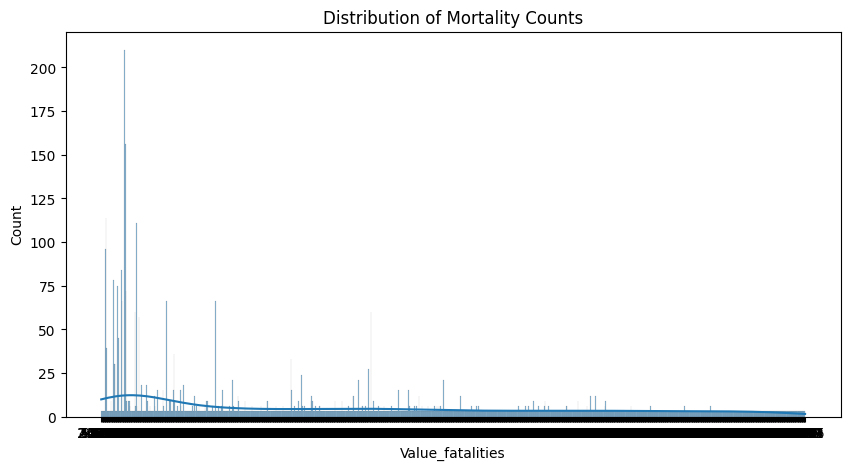

In [ ]:
numeric_df = filtered_df.select_dtypes(include=["number"])

plt.figure(figsize=(10, 5))
sns.histplot(filtered_df["Value_fatalities"], bins=20, kde=True)
plt.title("Distribution of Mortality Counts")
plt.show()

